<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/%EB%B2%84%EC%84%AF%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# classes: edible=e, poisonous=p (종속변수)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# gill-attachment: attached=a,descending=d,free=f,notched=n

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u

# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/mushroom/main/mushpre.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   class                   8124 non-null   object
 1   cap-shape               8124 non-null   object
 2   cap-surface             8124 non-null   object
 3   cap-color               8124 non-null   object
 4   gill-attachment         8124 non-null   object
 5   stalk-color-above-ring  8124 non-null   object
 6   stalk-color-below-ring  8124 non-null   object
 7   veil-type               8124 non-null   object
 8   veil-color              8124 non-null   object
 9   ring-number             8124 non-null   object
 10  habitat                 8124 non-null   object
dtypes: object(11)
memory usage: 698.3+ KB


,class,cap-shape,cap-surface,cap-color,gill-attachment,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,habitat
0,p,x,s,n,f,w,w,p,w,o,u
1,e,x,s,y,f,w,w,p,w,o,g
2,e,b,s,w,f,w,w,p,w,o,m
3,p,x,y,w,f,w,w,p,w,o,u
4,e,x,s,g,f,w,w,p,w,o,g


In [8]:
# Question 1

# 데이터를 df변수에 입력받고 각 열의 중복되지않는 원소의 수로 구성된 데이터 프레임을 형성하라. uniqueDf 변수에 저장하고 개수에 따른 내림차순 정렬 후 상위 3개 데이터를 출력하라
lst=[]
for col in df.columns:
    lst.append([col, df[col].nunique()]) # 각 컬럼별  nunique. 
print(lst)
uniqueDf=pd.DataFrame(lst).rename(columns={0:'className', 1:'Counts'}).sort_values('Counts',ascending=False)
#lst를 pd 화. 컬럼별로 재명명. counts를 기준으로 내림차순.
uniqueDf.head(3)

[['class', 2], ['cap-shape', 6], ['cap-surface', 4], ['cap-color', 10], ['gill-attachment', 2], ['stalk-color-above-ring', 9], ['stalk-color-below-ring', 9], ['veil-type', 1], ['veil-color', 4], ['ring-number', 3], ['habitat', 7]]


,className,Counts
3,cap-color,10
5,stalk-color-above-ring,9
6,stalk-color-below-ring,9


In [13]:
# Question 2

# 종속변수를 y (class)와 독립변수를 x 의 변수에 저장하여라. 변수타입 중 ‘veil-color’는 value 값이 1가지밖에 없으므로 제거하고 사용한다
y=df['class'].map(lambda x: 0 if x=='p' else 1) #독있으면 1, 없으면 0
#df.drop('veil-color', axis=1, inplace=True)
x=df
display(x.head())
display(y.head())

,class,cap-shape,cap-surface,cap-color,gill-attachment,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,habitat
0,p,x,s,n,f,w,w,p,o,u
1,e,x,s,y,f,w,w,p,o,g
2,e,b,s,w,f,w,w,p,o,m
3,p,x,y,w,f,w,w,p,o,u
4,e,x,s,g,f,w,w,p,o,g


0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [17]:
# Question 2

# 독립변수 x를 LabelEncode하여 x_label변수에 저장하라
#컬럼별 값들을 nunique에 따라 0~10 사이의 수로 인코딩

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_label=x.copy()
for v in x_label.columns:
  x_label[v]=le.fit_transform(x_label[v])

display(x_label)
x_label.info()  #숫자로 인코딩했으니 int 됨.


,class,cap-shape,cap-surface,cap-color,gill-attachment,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,habitat
0,1,5,2,4,1,7,7,0,1,5
1,0,5,2,9,1,7,7,0,1,1
2,0,0,2,8,1,7,7,0,1,3
3,1,5,3,8,1,7,7,0,1,5
4,0,5,2,3,1,7,7,0,1,1
...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,5,0,1,2
8120,0,5,2,4,0,5,5,0,1,2
8121,0,2,2,4,0,5,5,0,1,2
8122,1,3,3,4,1,7,7,0,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   class                   8124 non-null   int64
 1   cap-shape               8124 non-null   int64
 2   cap-surface             8124 non-null   int64
 3   cap-color               8124 non-null   int64
 4   gill-attachment         8124 non-null   int64
 5   stalk-color-above-ring  8124 non-null   int64
 6   stalk-color-below-ring  8124 non-null   int64
 7   veil-type               8124 non-null   int64
 8   ring-number             8124 non-null   int64
 9   habitat                 8124 non-null   int64
dtypes: int64(10)
memory usage: 634.8 KB


In [25]:
# Question 3

# 훈련 데이터셋과 테스트 데이터를 7:3으로 나누고 층화추출하여라
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_label, y, test_size=0.3, random_state=100, stratify=y) #stratify=y_data: 층화추출.
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

y_train.value_counts()

(5686, 10)
(2438, 10)
(5686,)
(2438,)


1    2945
0    2741
Name: class, dtype: int64

In [28]:
# Question 4

# SMOTE 방식을 이용하여 훈련 데이터의 부족한 종속변수 class를 over sampling 하라
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
#X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
pd.Series(y_train_over).value_counts() ## 아까 y 데이터가 1로분류된것은 2945, 0은 2741이었는데 둘다 똑같은 수로 맞춰짐. 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    2945
0    2945
dtype: int64

In [32]:
# Question 5

# 랜덤포레스트 방식을 이용하여 분류모델을 만들고 학습하라. 모델평가를 테스트셋으로 진행하고 accuracy, precision, recall 값을 구하여라
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10, max_depth=2, random_state=100)
model=rf.fit(X_train_over, y_train_over)
pred=rf.predict(X_test)

from sklearn.metrics import classification_report
report=classification_report(y_test, pred, target_names=['class 0', 'class 1'])
print(report)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      1175
     class 1       1.00      1.00      1.00      1263

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



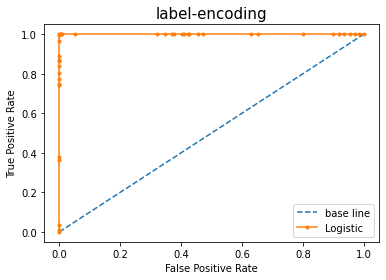

base line: ROC AUC=0.500
pred: ROC AUC=1.000


In [33]:
# Question 6

# 테스트셋에 대해 ROC커브를 그리고 auc 값을 측정하라
lr_probs = rf.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_auc_score ,roc_curve

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='base line')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('label-encoding',fontsize=15)
plt.legend()
plt.show()
print('base line: ROC AUC=%.3f' % (ns_auc))
print('pred: ROC AUC=%.3f' % (lr_auc))

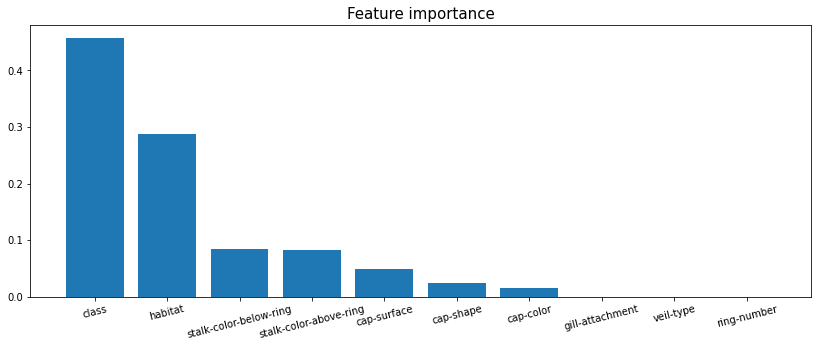

In [34]:
# Question 7

# 학습한 모델의 변수 중요도를 아래의 그래프 처럼 출력하라
importance = rf.feature_importances_

importanceDf = pd.DataFrame({'name':x.columns,'impor':importance}).sort_values('impor',ascending=False)

plt.figure(figsize=(14,5))
plt.bar(importanceDf.name,importanceDf.impor)
plt.xticks(rotation=14)
plt.title('Feature importance',fontsize=15)
plt.show()

In [37]:
# Question 8

# 독립변수를 Label encoding 방식이 아닌 one-hot encoding 방식으로 데이터를 변환 하여 x_dum 변수에 저장하라

x_dum = pd.get_dummies(x)

# Question 9

# 위의 학습 과정을 반복한다. 기존에 사용한 random_state값은 고정한다 smote 층화추출, randomforest 학습, 모델 평가 ,roc 커브 , auc값 추출

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_dum, y, test_size=0.3, random_state=200,stratify=y)

smote = SMOTE(random_state=0)
#X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_over, y_train_over)

y_pred = clf.predict(X_test)

report= classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
